In [1]:
#Importo librerías:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns

In [2]:
from scipy.stats import ks_2samp

## Funciones:

In [3]:
# Agregar padding a la imagen
def agrego_padding(img):
    '''
    agrega padding a una imagen
    '''
    
    image = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_CONSTANT, None, value = 0)
    return image


def calculo_LBP(img, centro):
    '''
    Calculo el valor del lbp para una matriz de 3x3
    '''
    i_centro = img[centro]
    i_pixel_0 = (img[(centro[0] - 1, centro[1] - 1)] >= img[centro]).astype(int)
    i_pixel_1 = (img[(centro[0], centro[1] - 1)] >= img[centro]).astype(int)
    i_pixel_2 = (img[(centro[0] + 1, centro[1] - 1)] >= img[centro]).astype(int)
    i_pixel_3 = (img[(centro[0] + 1, centro[1] )] >= img[centro]).astype(int)
    i_pixel_4 = (img[(centro[0] + 1, centro[1]+1)] >= img[centro]).astype(int)
    i_pixel_5 = (img[(centro[0], centro[1]+1)] >= img[centro]).astype(int)
    i_pixel_6 = (img[(centro[0] - 1, centro[1]+1)] >= img[centro]).astype(int)
    i_pixel_7 = (img[(centro[0] - 1, centro[1])] >= img[centro]).astype(int)
    binary = str(i_pixel_0) + str(i_pixel_1) + str(i_pixel_2) + str(i_pixel_3) + str(i_pixel_4) + str(i_pixel_5) + str(i_pixel_6) + str(i_pixel_7)
    return int(binary, 2)

def LBP (img):
    '''
    calcula LBP creando una nueva imagen
    '''
    matrix_lbp = np.zeros(img.shape)
    img = agrego_padding(img)
    filas = img.shape[0]
    columnas = img.shape[1]

    for i in range (1, filas - 1):
        for j in range (1, columnas - 1):

            lbp = calculo_LBP(img, (i,j))
            matrix_lbp[(i-1, j-1)] = lbp
    return matrix_lbp

## Imagenes ladrillos:

In [4]:
ladrillos1 = cv.imread('ladrillos1.png')
ladrillos1 = cv.cvtColor(ladrillos1,cv.COLOR_BGR2GRAY)
ladrillos2 = cv.imread('ladrillos2.png')
ladrillos2 = cv.cvtColor(ladrillos2,cv.COLOR_BGR2GRAY)

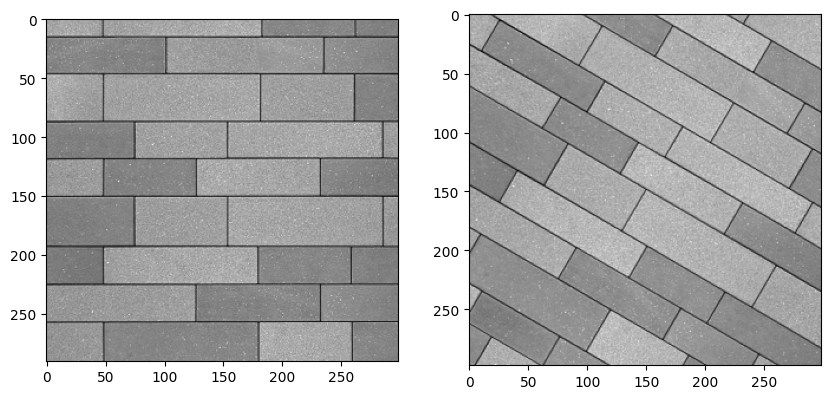

In [5]:
f, ax  = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax[0].imshow(ladrillos1, cmap='gray')
ax[1].imshow(ladrillos2, cmap='gray')
plt.show()

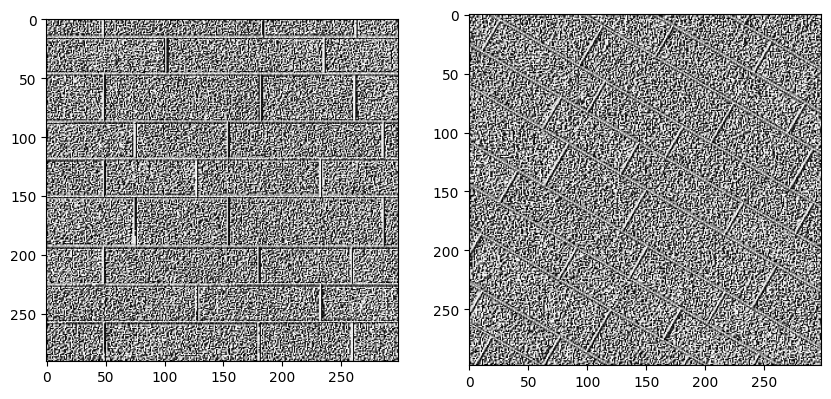

In [6]:
ladrillo1_lbp = LBP(ladrillos1)
ladrillo2_lbp = LBP(ladrillos2)
f, ax  = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax[0].imshow(ladrillo1_lbp, cmap='gray')
ax[1].imshow(ladrillo2_lbp, cmap='gray')
plt.show()

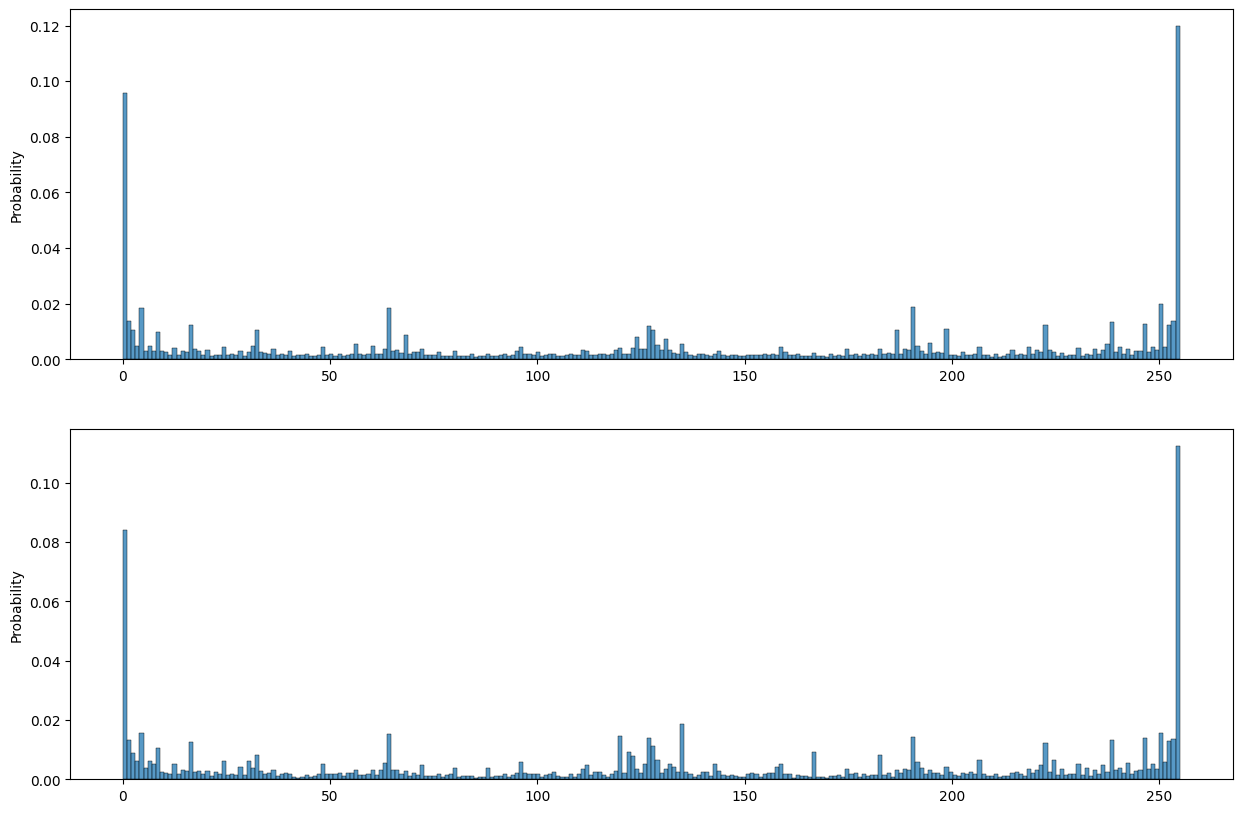

In [7]:
f, ax  = plt.subplots(nrows=2,ncols=1, figsize=(15,10))
sns.histplot(ladrillo1_lbp.flatten(), bins=256,stat='probability', ax=ax[0])
sns.histplot(ladrillo2_lbp.flatten(), bins=256,stat='probability', ax=ax[1])
plt.show()

**A simple vista viendo los dos histogramas se logra ver que los dos son muy parecidos.**

## Imagenes ovejas:

In [8]:
oveja1 = cv.imread('oveja1.png')
oveja1 = cv.cvtColor(oveja1,cv.COLOR_BGR2GRAY)
oveja2 = cv.imread('oveja2.png')
oveja2 = cv.cvtColor(oveja2,cv.COLOR_BGR2GRAY)

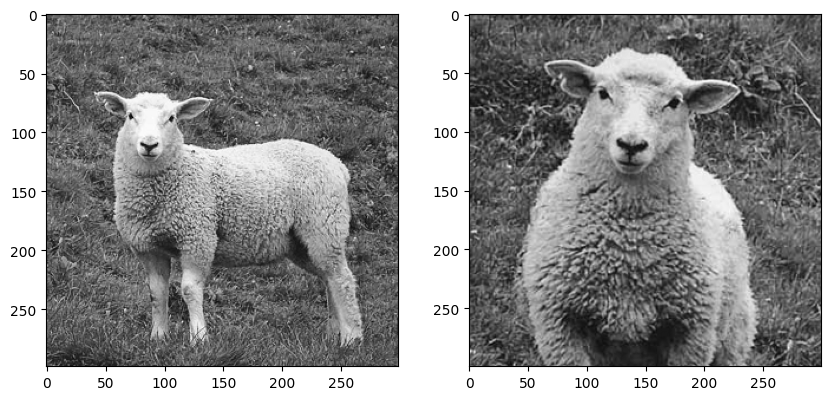

In [9]:
f, ax  = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax[0].imshow(oveja1, cmap='gray')
ax[1].imshow(oveja2, cmap='gray')
plt.show()

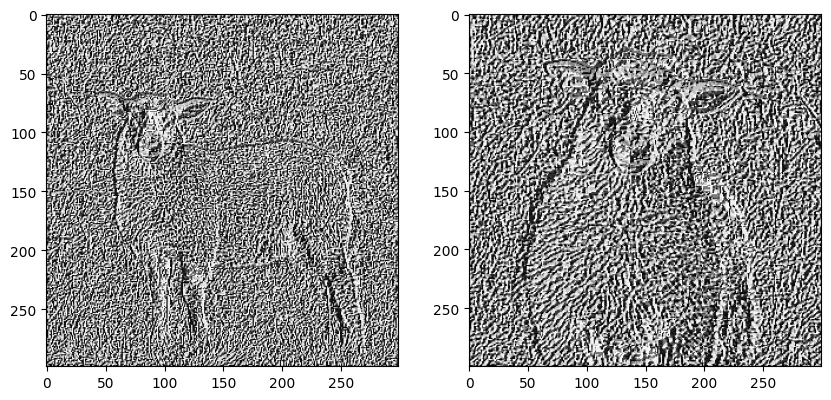

In [10]:
oveja1_lbp = LBP(oveja1)
oveja2_lbp = LBP(oveja2)
f, ax  = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax[0].imshow(oveja1_lbp, cmap='gray')
ax[1].imshow(oveja2_lbp, cmap='gray')
plt.show()

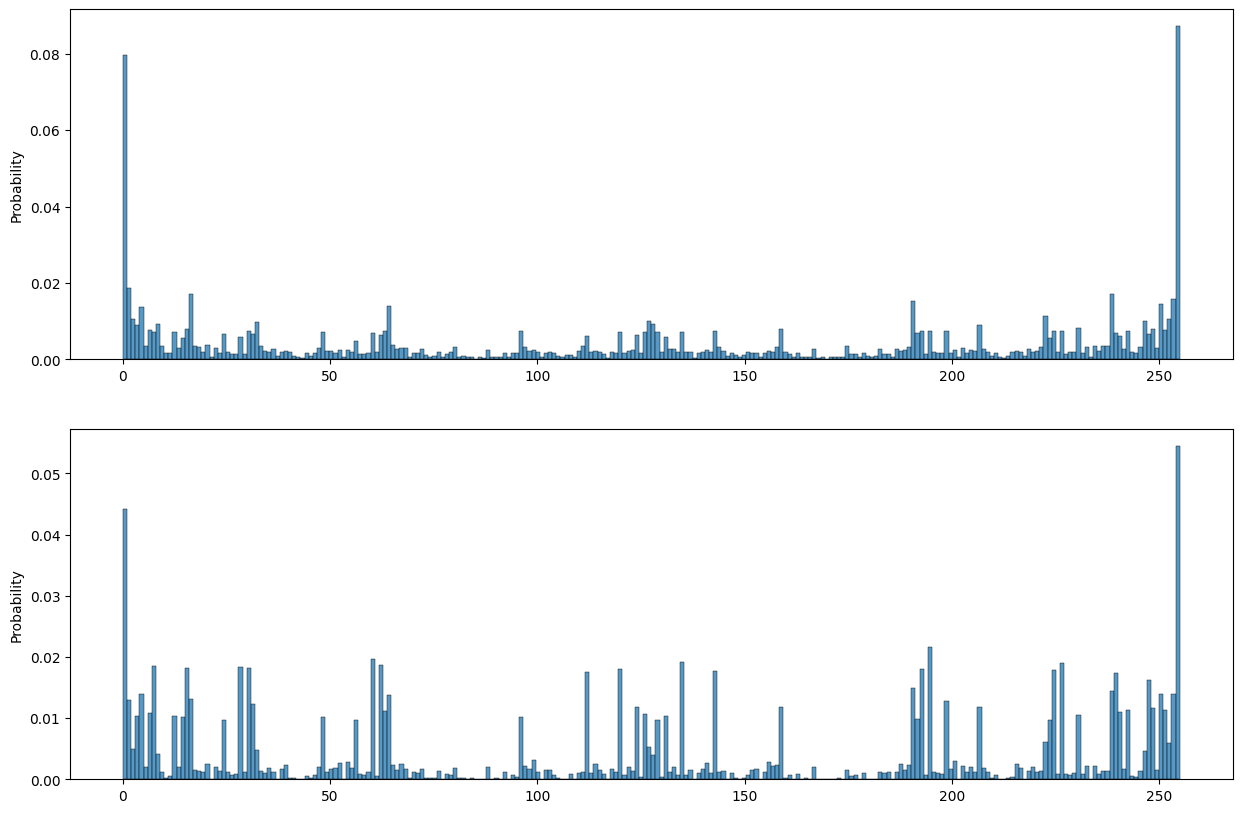

In [11]:
f, ax  = plt.subplots(nrows=2,ncols=1, figsize=(15,10))
sns.histplot(oveja1_lbp.flatten(), bins=256,stat='probability', ax=ax[0])
sns.histplot(oveja2_lbp.flatten(), bins=256,stat='probability', ax=ax[1])
plt.show()

**En el caso de las ovejas vemos que hay mayor diferencia entre los dos histogramas.**

## Imagenes piedras:

In [12]:
piedras1 = cv.imread('piedras1.png')
piedras1 = cv.cvtColor(piedras1,cv.COLOR_BGR2GRAY)
piedras2 = cv.imread('piedras2.png')
piedras2 = cv.cvtColor(piedras2,cv.COLOR_BGR2GRAY)

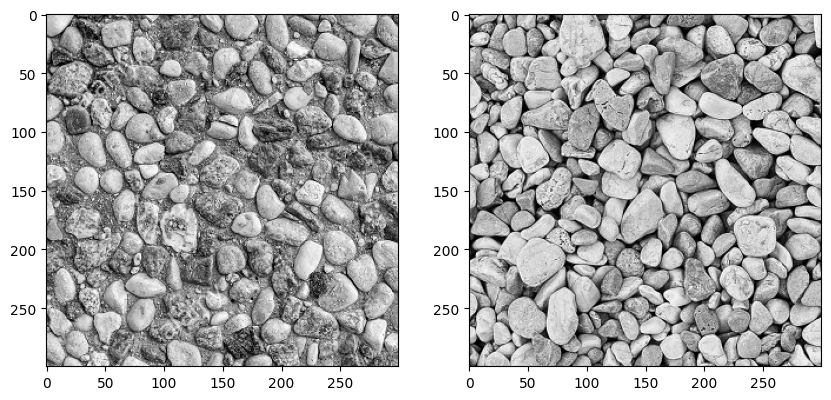

In [13]:
f, ax  = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax[0].imshow(piedras1, cmap='gray')
ax[1].imshow(piedras2, cmap='gray')
plt.show()

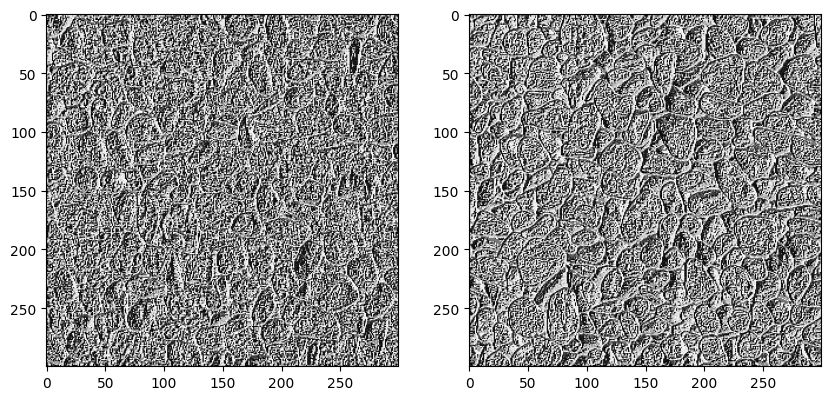

In [14]:
piedras1_lbp = LBP(piedras1)
piedras2_lbp = LBP(piedras2)
f, ax  = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax[0].imshow(piedras1_lbp, cmap='gray')
ax[1].imshow(piedras2_lbp, cmap='gray')
plt.show()

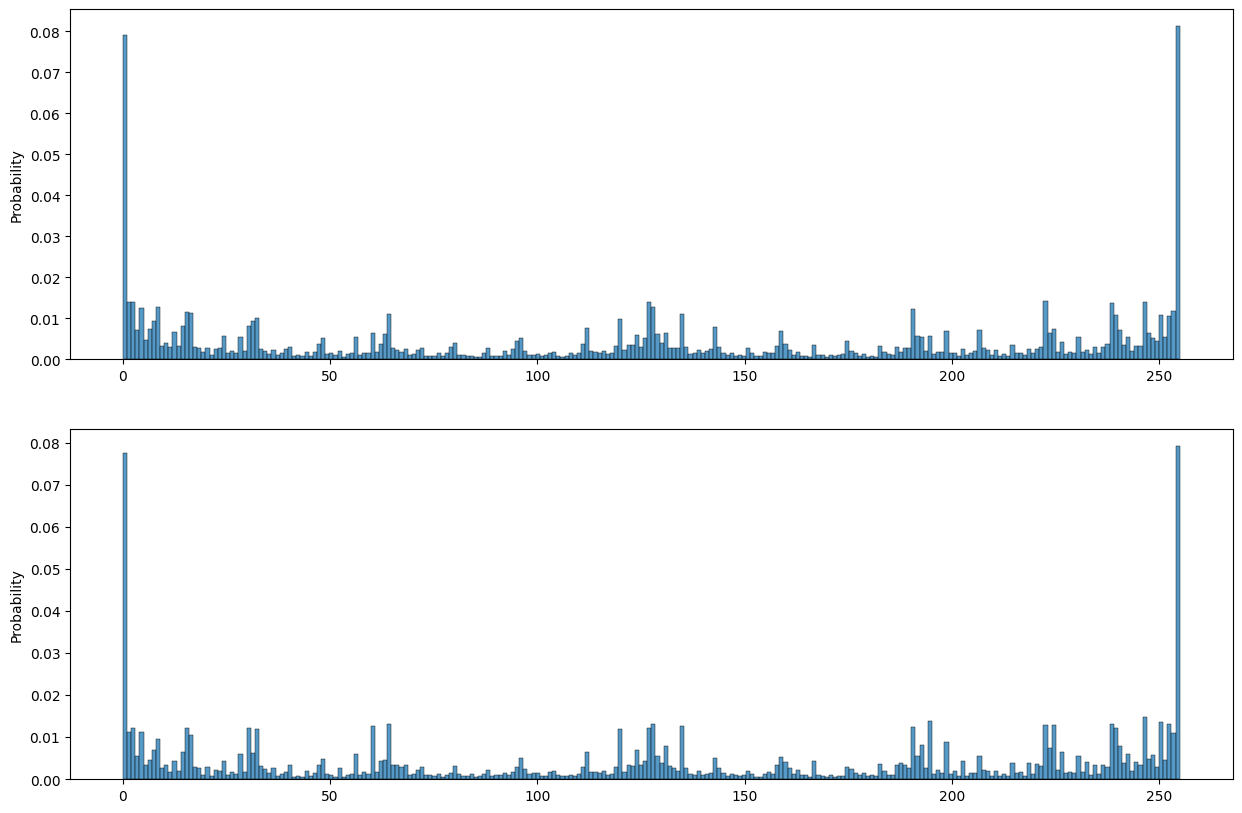

In [15]:
f, ax  = plt.subplots(nrows=2,ncols=1, figsize=(15,10))
sns.histplot(piedras1_lbp.flatten(), bins=256,stat='probability', ax=ax[0])
sns.histplot(piedras2_lbp.flatten(), bins=256,stat='probability', ax=ax[1])
plt.show()

**En el caso de las piedras vemos que al igual que los ladrillos los histogramas LBP de las dos imagenes se parecen bastante.**

## Imagen  cielo:

In [16]:
cielo = cv.imread('cielo.png')
cielo = cv.cvtColor(cielo,cv.COLOR_BGR2GRAY)

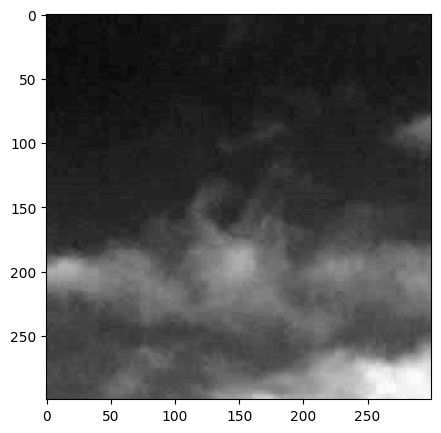

In [17]:
f, ax  = plt.subplots(nrows=1,ncols=1, figsize=(5,5))
ax.imshow(cielo, cmap='gray')
plt.show()

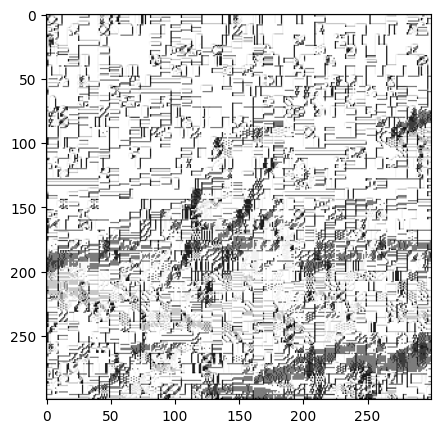

In [18]:
cielo_lbp = LBP(cielo)
f, ax  = plt.subplots(nrows=1,ncols=1, figsize=(5,5))
ax.imshow(cielo_lbp, cmap='gray')
plt.show()

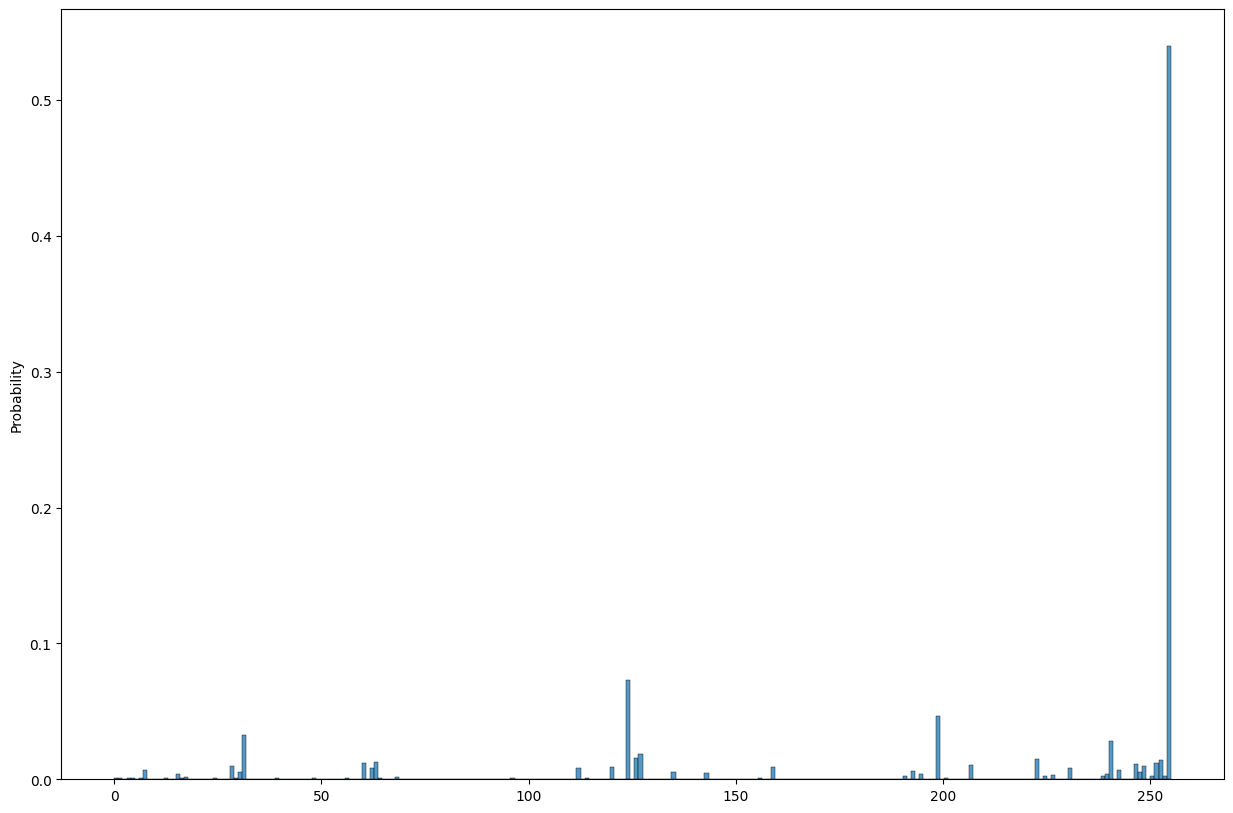

In [19]:
f, ax  = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.histplot(cielo_lbp.flatten(), bins=256,stat='probability')
plt.show()

**El histograma LBP de la imagen del cielo no se parece al resto:**

## Comparación entre histogramas:
Para determinar la diferencia de los histogramos se calculo la distancia Euclidiana o norma y la distancia Kolmogorov–Smirnov entre cada uno de los histogramas LBP de las imagenes.

In [20]:
# Distancia entre histogramas piedras:
h_piedras1, bins, _ = plt.hist(x=piedras1_lbp.flatten(),bins=256)
h_piedras2, bins, _ = plt.hist(x=piedras2_lbp.flatten(),bins=256)

h_oveja1, bins, _ = plt.hist(x=oveja1_lbp.flatten(),bins=256)
h_oveja2, bins, _ = plt.hist(x=oveja2_lbp.flatten(),bins=256)

h_ladrillo1, bins, _ = plt.hist(x=ladrillo1_lbp.flatten(),bins=256)
h_ladrillo2, bins, _ = plt.hist(x=ladrillo2_lbp.flatten(),bins=256)

h_cielo, bins, _ = plt.hist(x=cielo_lbp.flatten(),bins=256)


In [28]:
print("Distancia Euclidiana Histograma piedras1 y piedras2: ", np.linalg.norm(h_piedras1 - h_piedras2))
print("Distancia Euclidiana Histograma oveja1 y oveja2: ", np.linalg.norm(h_oveja1 - h_oveja2))
print("Distancia Euclidiana Histograma ladrillo1 y ladrillo2: ", np.linalg.norm(h_ladrillo1 - h_ladrillo2))
print("Distancia Euclidiana Histograma piedras1 y ladrillos1: ", np.linalg.norm(h_piedras1 - h_ladrillo1))
print("Distancia Euclidiana Histograma priedras1 y oveja2: ", np.linalg.norm(h_piedras1 - h_oveja1))
print("Distancia Euclidiana Histograma piedras2 y cielo: ", np.linalg.norm(h_piedras2 - h_cielo))
print("Distancia Euclidiana Histograma oveja1 y cielo: ", np.linalg.norm(h_oveja1 - h_cielo))
print("Distancia Euclidiana Histograma piedras1 y cielo: ", np.linalg.norm(h_piedras1 - h_cielo))
print("Distancia Euclidiana Histograma ladrillo1 y cielo: ", np.linalg.norm(h_ladrillo1 - h_cielo))


Distancia Euclidiana Histograma piedras1 y piedras2:  1691.477460683411
Distancia Euclidiana Histograma oveja1 y oveja2:  6452.530433868561
Distancia Euclidiana Histograma ladrillo1 y ladrillo2:  2697.9444026888323
Distancia Euclidiana Histograma piedras1 y ladrillos1:  4316.313473324198
Distancia Euclidiana Histograma priedras1 y oveja2:  1908.548925230894
Distancia Euclidiana Histograma piedras2 y cielo:  42998.36764343503
Distancia Euclidiana Histograma oveja1 y cielo:  42416.686445313004
Distancia Euclidiana Histograma piedras1 y cielo:  42848.88003203818
Distancia Euclidiana Histograma ladrillo1 y cielo:  40168.57204332761


In [29]:
print("Distancia Kolmogorov–Smirnov entre piedras1 y piedras2: ", ks_2samp(h_piedras1 , h_piedras2))
print("Distancia Kolmogorov–Smirnov entre oveja1 y oveja2: ", ks_2samp(h_oveja1 , h_oveja2))
print("Distancia Kolmogorov–Smirnov entre ladrillo1 y ladrillo2: ", ks_2samp(h_ladrillo1 , h_ladrillo2))
print("Distancia Kolmogorov–Smirnov entre piedras1 y ladrillos1: ", ks_2samp(h_piedras1 , h_ladrillo1))
print("Distancia Kolmogorov–Smirnov entre priedras1 y oveja2: ", ks_2samp(h_piedras1 , h_oveja1))
print("Distancia Kolmogorov–Smirnov entre piedras2 y cielo: ", ks_2samp(h_piedras2 , h_cielo))
print("Distancia Kolmogorov–Smirnov entre oveja1 y cielo: ", ks_2samp(h_oveja1 , h_cielo))
print("Distancia Kolmogorov–Smirnov entre piedras1 y cielo: ", ks_2samp(h_piedras1 , h_cielo))
print("Distancia Kolmogorov–Smirnov entre ladrillo1 y cielo: ", ks_2samp(h_ladrillo1 , h_cielo))


Distancia Kolmogorov–Smirnov entre piedras1 y piedras2:  KstestResult(statistic=0.0859375, pvalue=0.3013522815409377)
Distancia Kolmogorov–Smirnov entre oveja1 y oveja2:  KstestResult(statistic=0.29296875, pvalue=4.3297655309835245e-10)
Distancia Kolmogorov–Smirnov entre ladrillo1 y ladrillo2:  KstestResult(statistic=0.1328125, pvalue=0.021775665826819023)
Distancia Kolmogorov–Smirnov entre piedras1 y ladrillos1:  KstestResult(statistic=0.16015625, pvalue=0.0027707221261445312)
Distancia Kolmogorov–Smirnov entre priedras1 y oveja2:  KstestResult(statistic=0.1328125, pvalue=0.021775665826819023)
Distancia Kolmogorov–Smirnov entre piedras2 y cielo:  KstestResult(statistic=0.76953125, pvalue=6.629676574627092e-75)
Distancia Kolmogorov–Smirnov entre oveja1 y cielo:  KstestResult(statistic=0.74609375, pvalue=9.318279536624159e-70)
Distancia Kolmogorov–Smirnov entre piedras1 y cielo:  KstestResult(statistic=0.78515625, pvalue=1.6822360582715281e-78)
Distancia Kolmogorov–Smirnov entre ladrill

* Los histogramas que presentan menor diferencia son los histogramas de las dos imagenes de piedras.
* Como era de esperarse los histogramas LBP de las imagenes de piedras y ladrillos son muy parecidos. 
* Hay mayor diferencia entre los histogramas de las imagenes lbp de las ovejas.
* Existe muy poca diferencia entre los histogramas de las imagenes de piedras y ovejas, de hecho es mucho menor que la diferencia entre las dos imagenes de ovejas.
* Hay mucha mas diferencia entre los histogramas de imagen del cielo y el resto de las imagenes.

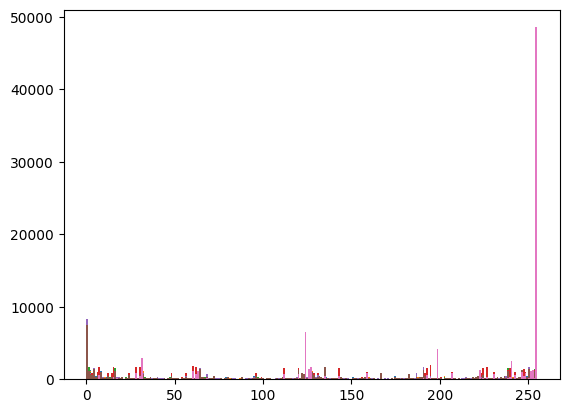

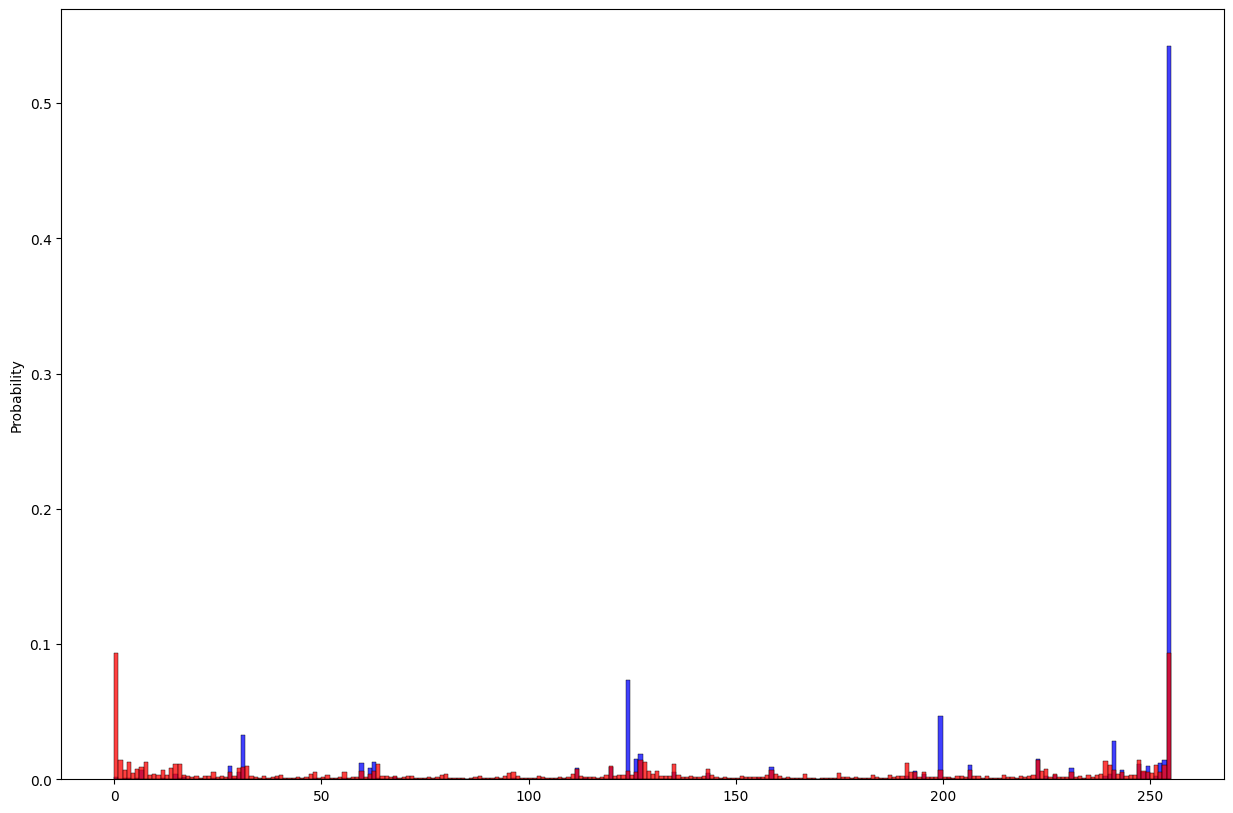

In [23]:
#Cielo vs Piedras:
f, ax  = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.histplot(cielo_lbp.flatten(), bins=250,stat='probability', color='Blue')
sns.histplot(piedras1_lbp.flatten(), bins=250,stat='probability', color='Red')
plt.show()

**Se nota la diferencia en los dos histogramas en todas las frecuencias, se observa que el histograma de piedras posee mayor intensidad en las frecuencias altas y el de cielo en las frecuencias bajas**

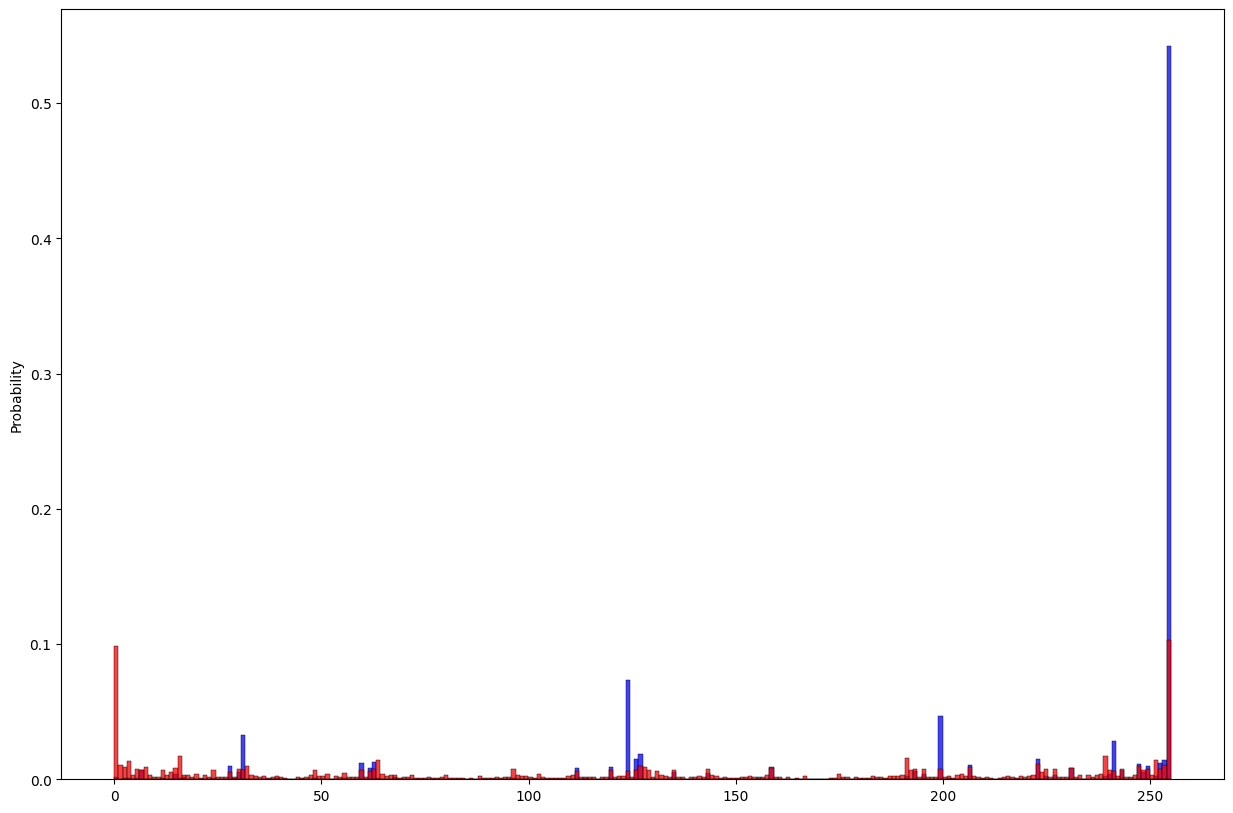

In [24]:
#Cielo vs Oveja:
f, ax  = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.histplot(cielo_lbp.flatten(), bins=250,stat='probability', color='Blue')
sns.histplot(oveja1_lbp.flatten(), bins=250,stat='probability', color='Red')
plt.show()

**Se observa el mismo comportamiento que en el histograma anterior.**

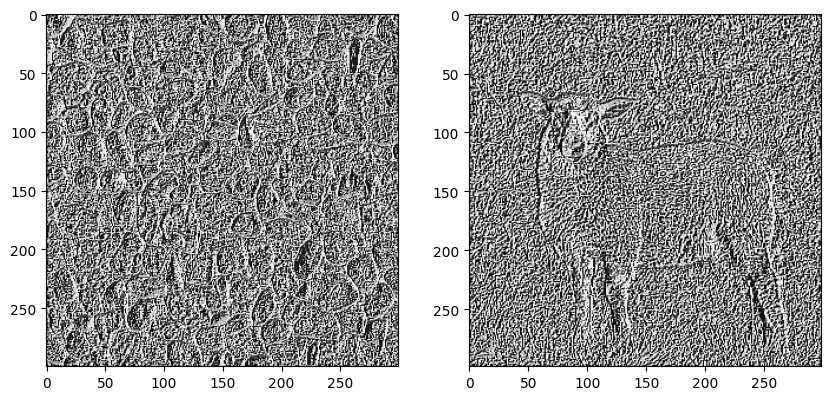

In [25]:
f, ax  = plt.subplots(nrows=1,ncols=2, figsize=(10,10))
ax[0].imshow(piedras1_lbp, cmap='gray')
ax[1].imshow(oveja1_lbp, cmap='gray')
plt.show()

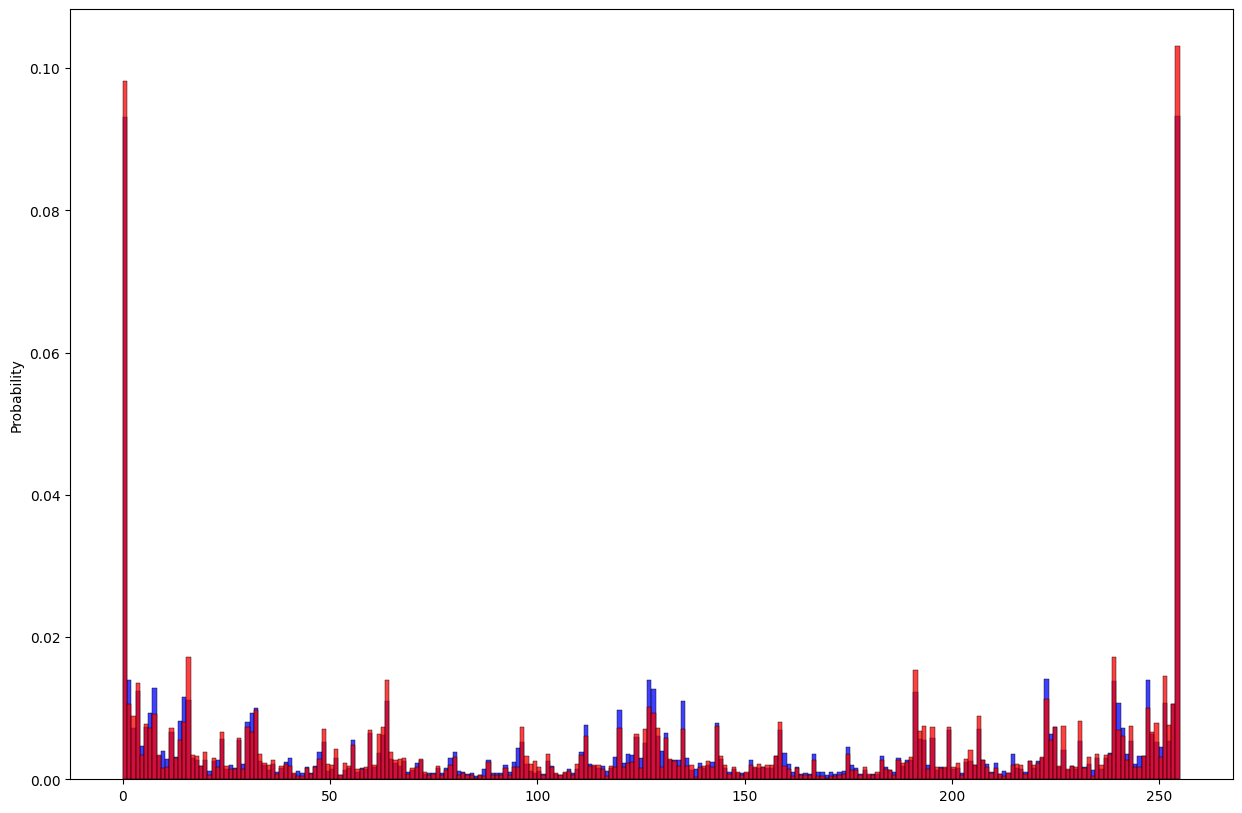

In [26]:
#Cielo vs Oveja:
f, ax  = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.histplot(piedras1_lbp.flatten(), bins=250,stat='probability', color='Blue')
sns.histplot(oveja1_lbp.flatten(), bins=250,stat='probability', color='Red')
plt.show()

**La poca diferencia entre los dos descriptores nos da a entender que es probable que no sea el mejor descriptor para imagenes con texturas similares.**